# Life Expectancy Model

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

## Importing the dataset

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
# show first 5 row from dataset
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Data Processing and preparation 

In [6]:
# Drop the 'Country' column because it may not be relevant for predicting life expectancy

data = data.drop('Country', axis=1)

In [7]:
# Initialize the LabelEncoder to convert categorical 'Status' values into numeric labels

label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])

In [8]:
# Display the value counts of the 'Status' column to check the number of occurrences of each category

data['Status'].value_counts()

Status
1    2426
0     512
Name: count, dtype: int64

In [9]:
# Print the number of missing values in each column of the dataset

print(data.isnull().sum())

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [10]:
# Fill any missing values with the column mean

data = data.fillna(data.mean())
data

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [11]:
# Print again the number of missing values in each column after filling

print(data.isnull().sum())

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [12]:
# Check for duplicated rows in the dataset

data.duplicated().sum()

np.int64(0)

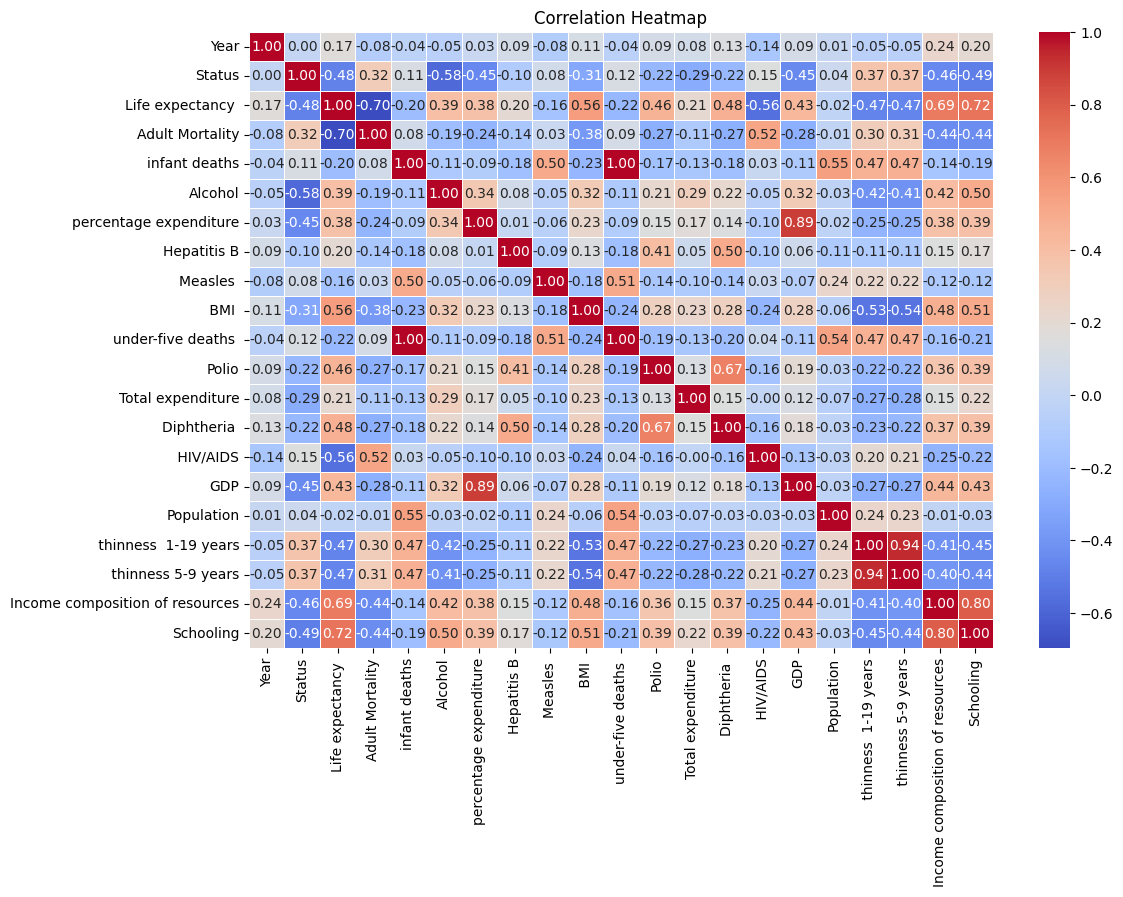

In [13]:
# Create a heatmap of the correlation matrix

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Select the columns of interest for the analysis
selected_columns = ['Status', 'Adult Mortality','Polio','BMI','Diphtheria','HIV/AIDS','GDP','Thinness 1-19 years','Thinness 5-9 years','Income composition of resources','Schooling' ,'Life expectancy ']
df = data.iloc[:, [1,3,11,9,13,14,15,17,18,19,20,2]]
df

,Status,Adult Mortality,Polio,BMI,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,1,263.0,6.0,19.1,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,1,271.0,58.0,18.6,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,1,268.0,62.0,18.1,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,1,272.0,67.0,17.6,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,1,275.0,68.0,17.2,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,723.0,67.0,27.1,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,1,715.0,7.0,26.7,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,1,73.0,73.0,26.3,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,1,686.0,76.0,25.9,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [15]:
# Separate the features (X) from the target variable (y)

x = df.iloc[:, :-1] 
x

,Status,Adult Mortality,Polio,BMI,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,263.0,6.0,19.1,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,1,271.0,58.0,18.6,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,1,268.0,62.0,18.1,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,1,272.0,67.0,17.6,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,1,275.0,68.0,17.2,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2933,1,723.0,67.0,27.1,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,1,715.0,7.0,26.7,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,1,73.0,73.0,26.3,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,1,686.0,76.0,25.9,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [16]:
y = df.iloc[:, -1]
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

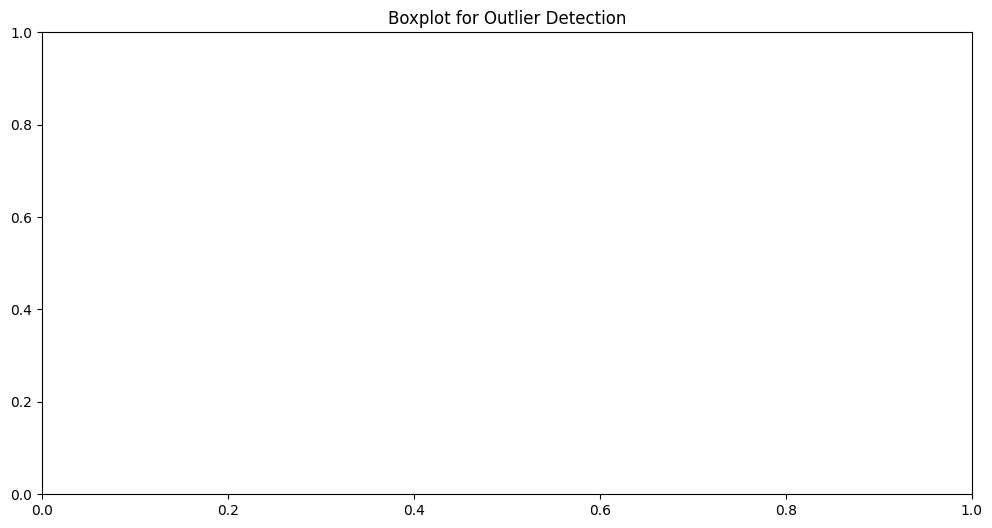

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using a boxplot for all numeric columns in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(df=df.select_dtypes(include=[np.number]))  # Apply to numeric columns
plt.title("Boxplot for Outlier Detection")
plt.show()

## Splitting the dataset into the Training set and Test set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
print(x_train.shape)
print(x_test.shape)

(2350, 11)
(588, 11)


## Feature Scaling

In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
print(x_train)

[[-2.22471731 -0.80868663  0.66172477 ... -0.86428774  0.98254151
   0.47154588]
 [ 0.44949531  0.85601085 -0.98404866 ...  1.53515987 -1.07165266
  -1.34643188]
 [-2.22471731 -0.33648879  0.45072817 ... -0.59768245  0.97261787
   0.84130407]
 ...
 [ 0.44949531 -1.1048107  -3.1362139  ...  0.66869268 -0.63005053
  -1.16155279]
 [ 0.44949531 -0.00835131 -0.1822616  ...  1.49072566 -0.14379201
   0.04016132]
 [ 0.44949531  0.25575935 -0.43545752 ... -0.55324823  0.57567213
   0.99536998]]


## Linear Regression model

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)
y_pred

array([77.53522422, 65.23029669, 53.29468359, 66.94607367, 60.14999142,
       60.8598548 , 72.0348247 , 78.25829814, 70.55845763, 47.98643044,
       67.23485314, 79.57619477, 72.55740474, 73.99483733, 60.18972019,
       72.47687058, 59.55537538, 67.111621  , 70.40905418, 80.71106061,
       68.97379232, 74.64789632, 73.50794602, 80.76111766, 67.4763096 ,
       60.31029709, 82.37605004, 72.7692322 , 70.69779874, 70.38733184,
       76.48294431, 53.06453704, 75.02282107, 76.68886077, 76.17556742,
       70.94032078, 75.08821751, 83.75305995, 62.84647756, 70.37984496,
       65.12860722, 72.97751219, 75.54685073, 73.6956701 , 72.04634612,
       78.90068518, 58.7510373 , 72.24453363, 54.8483058 , 72.75910643,
       74.35707281, 62.64039223, 78.21987497, 69.49872223, 67.46359742,
       71.86460999, 80.81062812, 71.10503973, 60.85061975, 71.09846949,
       70.02855721, 71.39687619, 72.0048215 , 67.98679316, 59.13474552,
       73.44668408, 70.24414693, 74.66634678, 63.56372212, 75.80

In [24]:
# Calculate evaluation metrics for the Linear Regression model
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
r2 = r2_score(y_test, y_pred) # R-squared Score

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 3.03
Mean Squared Error: 16.79
R² Score: 0.82


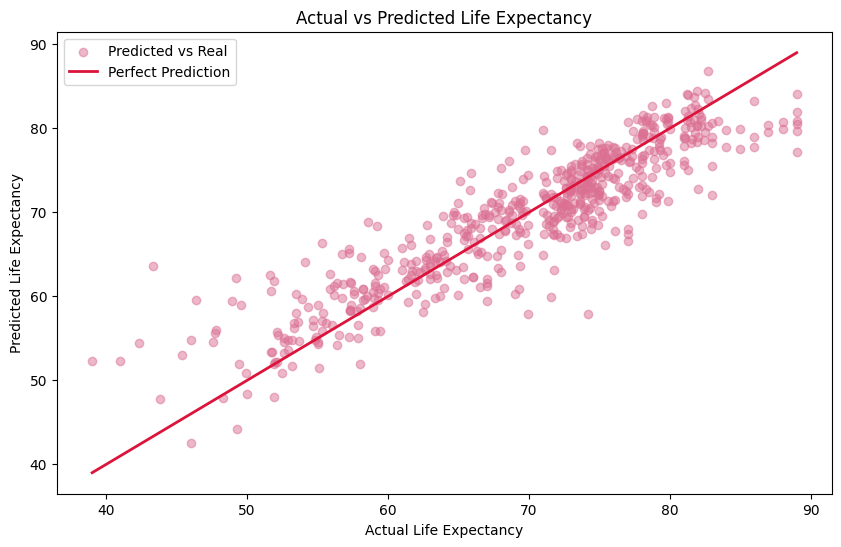

In [25]:
# Plot Actual vs Predicted values for the Linear Regression model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="PaleVioletRed", label="Predicted vs Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='Crimson', lw=2, label="Perfect Prediction")
plt.title("Actual vs Predicted Life Expectancy")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.show()

## KNN Regression model

In [26]:
knn = KNeighborsRegressor(5) 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [27]:
y_pred = knn.predict(x_test)

In [28]:
# Calculate evaluation metrics for the KNN model

knn_mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
knn_mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
knn_r2 = r2_score(y_test, y_pred) # R-squared Score

print(f"Mean Squared Error: {knn_mse:.2f}")
print(f"Mean Absolute Error: {knn_mae:.2f}")
print(f"R² Score: {knn_r2:.2f}")

Mean Squared Error: 7.80
Mean Absolute Error: 1.79
R² Score: 0.91


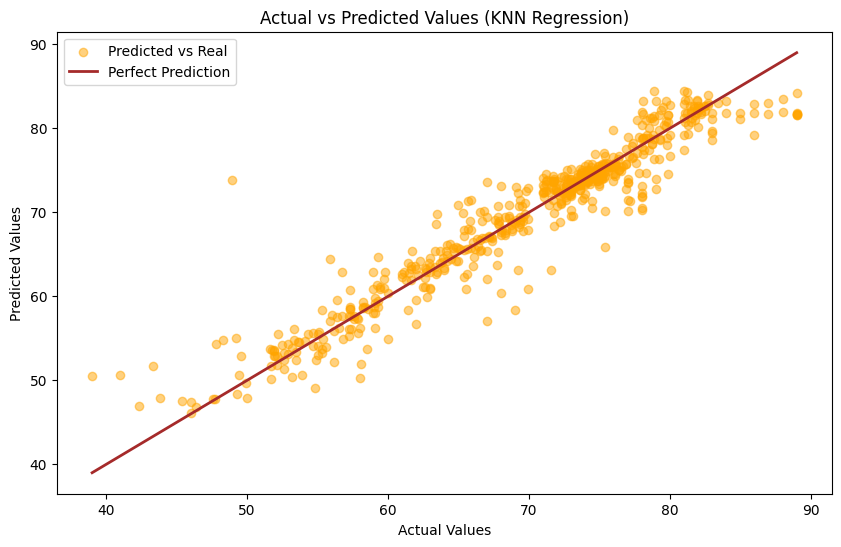

In [29]:
# Plot Actual vs Predicted values for the KNN Regression model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="Orange", label="Predicted vs Real")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='Brown', lw=2, label="Perfect Prediction")
plt.title('Actual vs Predicted Values (KNN Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()